# test_CTD_Tools
This script tests the functions contained in CTD_Tools.py

## First let's test each individual function:

In [1]:
#Import Dependancies
import numpy as np
import CTD_Tools
from matplotlib import pyplot as plt
from plotly import express as px

%load_ext autoreload
%autoreload 2

In [2]:
file_name_deep = 'CSVs/oregon_slope_base_deep_profiler_CTD_20190714_20190715.csv'
file_name_shallow = 'CSVs/oregon_slope_base_shallow_profiler_CTD_20190714_20190715.csv'
profiler1 = 'deep'
profiler2 = 'shallow'

data_out_deep = CTD_Tools.read_CTD_data(file_name_deep, profiler1)
data_out_shallow = CTD_Tools.read_CTD_data(file_name_shallow, profiler2)

In [3]:
depth_shallow, speed_shallow = CTD_Tools.calc_ssp(data_out_shallow)
depth_deep, speed_deep = CTD_Tools.calc_ssp(data_out_deep)

#Manually Cut Shallow
depth_shallow, speed_shallow = CTD_Tools.manually_cut_to_8_passes(depth_shallow, speed_shallow)

In [4]:
# Combine 2 ssps
depth, speed = CTD_Tools.combine_ssps(depth_shallow, speed_shallow, depth_deep, speed_deep)

In [5]:
#Sort 2 ssps
depth_sort, speed_sort = CTD_Tools.sort_ssp(depth, speed)

In [6]:
# Manually remove problem data
depth_cut, speed_cut = CTD_Tools.manually_cut_problems(depth_sort, speed_sort)

In [7]:
# Calculate Moving Average
depth_ma, speed_ma = CTD_Tools.calc_moving_average(depth_cut, speed_cut)

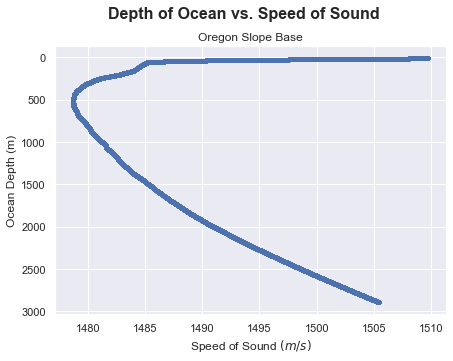

In [8]:
# Plot Sound Speed Profile
CTD_Tools.plot_ssp(depth_ma, speed_ma)

## Now Test get_ssp_PC01A() - which combines all functions and returns ssp

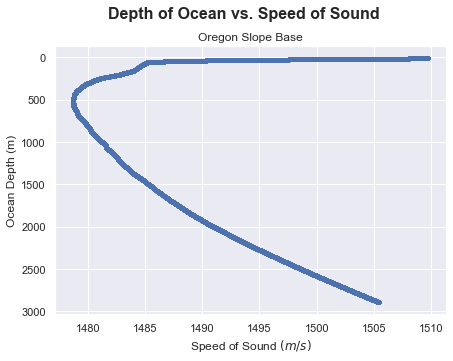

In [9]:
ssp = CTD_Tools.get_ssp_PC01A()